In [ ]:
!pip install meteostat

In [93]:
import geopandas
import pandas as pd

from meteostat import Stations, Daily, Hourly
import datetime as dt
from dbconf import get_engine

In [86]:
stations = Stations()
stations = stations.region('TZ')

print('Stations in Tanzania:', stations.count())

Stations in Tanzania: 27


In [87]:
stations_df = stations.fetch()

In [89]:
stations_df.head(5)

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end
id,,,,,,,,,,,,,,,
63729,Bukoba,TZ,KA,63729,HTBU,-1.3333,31.8167,1137.0,Africa/Dar_es_Salaam,1957-01-01,2022-06-20,1950-01-01,2021-12-26,1950-01-01,1989-01-01
63733,Musoma,TZ,MR,63733,HTMU,-1.5000,33.8000,1147.0,Africa/Dar_es_Salaam,1957-01-01,2022-06-21,1950-01-01,2021-12-01,1950-01-01,1989-01-01
63756,Mwanza,TZ,MW,63756,HTMW,-2.4667,32.9167,1139.0,Africa/Dar_es_Salaam,1950-01-08,2022-06-21,1950-01-01,2022-06-11,1950-01-01,2021-01-01
63789,Arusha,TZ,AR,63789,HTAR,-3.3333,36.6167,1387.0,Africa/Dar_es_Salaam,1960-01-11,2022-06-21,1959-02-01,2021-12-01,1959-01-01,1989-01-01
63790,Moshi,TZ,KJ,63790,HTMS,-3.3500,37.3333,854.0,Africa/Dar_es_Salaam,1949-09-09,2022-05-23,1950-01-01,1989-12-31,1950-01-01,1989-01-01


In [12]:
stations_df['meteostat_id'] = stations_df.index
stations_df.insert(0, 'meteostat_id', stations_df.pop('meteostat_id')) # move meteostat ID to second column (directly ≤after index)


In [90]:
stations_df.head(5)

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end
id,,,,,,,,,,,,,,,
63729,Bukoba,TZ,KA,63729,HTBU,-1.3333,31.8167,1137.0,Africa/Dar_es_Salaam,1957-01-01,2022-06-20,1950-01-01,2021-12-26,1950-01-01,1989-01-01
63733,Musoma,TZ,MR,63733,HTMU,-1.5000,33.8000,1147.0,Africa/Dar_es_Salaam,1957-01-01,2022-06-21,1950-01-01,2021-12-01,1950-01-01,1989-01-01
63756,Mwanza,TZ,MW,63756,HTMW,-2.4667,32.9167,1139.0,Africa/Dar_es_Salaam,1950-01-08,2022-06-21,1950-01-01,2022-06-11,1950-01-01,2021-01-01
63789,Arusha,TZ,AR,63789,HTAR,-3.3333,36.6167,1387.0,Africa/Dar_es_Salaam,1960-01-11,2022-06-21,1959-02-01,2021-12-01,1959-01-01,1989-01-01
63790,Moshi,TZ,KJ,63790,HTMS,-3.3500,37.3333,854.0,Africa/Dar_es_Salaam,1949-09-09,2022-05-23,1950-01-01,1989-12-31,1950-01-01,1989-01-01


In [15]:
stations_df = stations_df.reset_index(drop=True)

In [16]:
stations_df

,meteostat_id,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end
0,63729,Bukoba,TZ,KA,63729,HTBU,-1.3333,31.8167,1137.0,Africa/Dar_es_Salaam,1957-01-01,2022-04-10,1950-01-01,2021-12-26,1950-01-01,1989-01-01
1,63733,Musoma,TZ,MR,63733,HTMU,-1.5000,33.8000,1147.0,Africa/Dar_es_Salaam,1957-01-01,2022-04-10,1950-01-01,2021-12-01,1950-01-01,1989-01-01
2,63756,Mwanza,TZ,MW,63756,HTMW,-2.4667,32.9167,1139.0,Africa/Dar_es_Salaam,1950-01-08,2022-04-10,1950-01-01,2022-04-06,1950-01-01,2021-01-01
3,63789,Arusha,TZ,AR,63789,HTAR,-3.3333,36.6167,1387.0,Africa/Dar_es_Salaam,1960-01-11,2022-04-10,1959-02-01,2021-12-01,1959-01-01,1989-01-01
4,63790,Moshi,TZ,KJ,63790,HTMS,-3.3500,37.3333,854.0,Africa/Dar_es_Salaam,1949-09-09,2022-02-22,1950-01-01,1989-12-31,1950-01-01,1989-01-01
5,63791,Kilimanjaro Airport,TZ,AR,63791,HTKJ,-3.4167,37.0667,891.0,Africa/Dar_es_Salaam,1970-01-01,2022-04-10,1971-10-01,2022-03-22,1971-01-01,1990-01-01
6,63801,Kigoma,TZ,KI,63801,HTKA,-4.8833,29.6333,882.0,Africa/Dar_es_Salaam,1957-01-01,2022-04-10,2006-12-13,2021-12-01,NaT,NaT
7,63816,Same,TZ,KJ,63816,HTSE,-4.0833,37.7167,872.0,Africa/Dar_es_Salaam,1957-01-01,2022-02-22,1950-01-01,1990-02-28,1950-01-01,1990-01-01
8,63818,Mombo,TZ,TN,63818,HTMO,-4.8833,38.2833,511.0,Africa/Dar_es_Salaam,1958-02-06,2020-11-20,NaT,NaT,NaT,NaT
9,63832,Tabora Airport,TZ,TB,63832,HTTB,-5.0833,32.8333,1181.0,Africa/Dar_es_Salaam,1949-01-21,2022-04-10,1951-08-01,2022-04-06,1949-01-01,2021-01-01


In [91]:
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2020, 12, 31)

data = Daily('63729', start, end)
data = data.fetch()

In [92]:
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2008-05-11,22.3,18.0,26.4,NaN,NaN,NaN,5.3,NaN,NaN,NaN
2008-05-17,22.9,18.8,26.0,NaN,NaN,NaN,11.6,NaN,NaN,NaN
2008-05-19,23.0,19.0,25.1,NaN,NaN,NaN,9.5,NaN,NaN,NaN
2008-05-28,21.8,17.7,25.0,NaN,NaN,NaN,6.3,NaN,NaN,NaN
2008-06-20,21.0,16.9,25.0,NaN,NaN,NaN,5.2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-12-25,21.0,18.0,25.0,NaN,NaN,6.0,3.9,NaN,NaN,NaN
2020-12-26,21.3,18.0,26.0,NaN,NaN,1.0,4.0,NaN,NaN,NaN
2020-12-27,20.6,17.0,24.0,NaN,NaN,353.0,5.7,NaN,NaN,NaN


In [95]:
datah = Hourly('63729', start, end)
datah = datah.fetch()

In [96]:
datah

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2000-01-04 06:00:00,20.6,17.8,84.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2000-01-06 06:00:00,22.0,16.3,70.0,NaN,NaN,140.0,9.4,NaN,NaN,NaN,NaN
2000-01-07 06:00:00,21.6,18.4,82.0,NaN,NaN,50.0,7.6,NaN,NaN,NaN,NaN
2000-01-10 06:00:00,17.6,16.6,94.0,NaN,NaN,360.0,13.0,NaN,NaN,NaN,NaN
2000-01-11 06:00:00,21.6,18.4,82.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 18:00:00,21.5,20.0,91.0,NaN,NaN,NaN,0.0,NaN,1015.0,NaN,NaN
2019-12-31 19:00:00,21.0,20.0,94.0,NaN,NaN,NaN,0.0,NaN,1015.0,NaN,NaN
2019-12-31 20:00:00,21.0,18.9,88.0,NaN,NaN,NaN,0.0,NaN,1015.0,NaN,NaN


---

In [7]:
regions_gdf = geopandas.read_postgis('SELECT * FROM shape', 
                                     con=get_engine(), geom_col='geometry')

In [43]:
shape = regions_gdf.at[2, 'geometry']

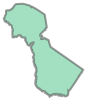

In [44]:
shape

In [39]:
stations_gdf = geopandas.read_postgis('SELECT * FROM meteostat_stations', 
                                     con=get_engine(), geom_col='geometry')

<AxesSubplot:>

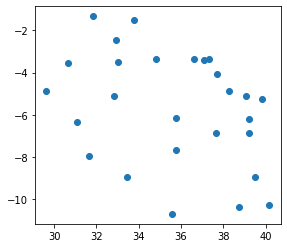

In [40]:
stations_gdf.plot()

In [45]:
gdfx = stations_gdf[stations_gdf.within(shape)].reset_index(drop=True)

In [46]:
gdfx

,id,meteostat_id,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,geometry
0,5,63790,Moshi,TZ,KJ,63790,HTMS,-3.3500,37.3333,854.0,Africa/Dar_es_Salaam,1949-09-09,2022-05-23,1950-01-01,1989-12-31,1950-01-01,1989-01-01,POINT (37.33330 -3.35000)
1,6,63791,Kilimanjaro Airport,TZ,AR,63791,HTKJ,-3.4167,37.0667,891.0,Africa/Dar_es_Salaam,1970-01-01,2022-06-12,1971-10-01,2022-04-14,1971-01-01,1990-01-01,POINT (37.06670 -3.41670)
2,8,63816,Same,TZ,KJ,63816,HTSE,-4.0833,37.7167,872.0,Africa/Dar_es_Salaam,1957-01-01,2022-05-23,1950-01-01,1990-02-28,1950-01-01,1990-01-01,POINT (37.71670 -4.08330)


<AxesSubplot:>

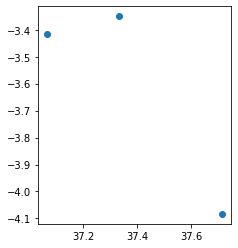

In [47]:
gdfx.plot()

In [48]:
station_ids = list(gdfx['id'].unique())

In [50]:
str(shape.centroid)

'POINT (37.640980782653465 -3.762520868533525)'

In [51]:
dfxs = []

for sid in station_ids:
    dfxs.append(pd.read_sql('SELECT * FROM meteostat_data \
        WHERE meteostat_station_id = ' + str(sid), con=get_engine()))
                  

In [53]:
df = dfxs[0]
for i in range(1, len(dfxs)):
    df = df.merge(dfxs[i], how='outer', on='time')

In [81]:
df.columns

Index(['time', 'tavg_x', 'tmin_x', 'tmax_x', 'prcp_x', 'snow_x', 'wdir_x',
       'wspd_x', 'wpgt_x', 'pres_x', 'tsun_x', 'meteostat_station_id_x',
       'tavg_y', 'tmin_y', 'tmax_y', 'prcp_y', 'snow_y', 'wdir_y', 'wspd_y',
       'wpgt_y', 'pres_y', 'tsun_y', 'meteostat_station_id_y', 'tavg', 'tmin',
       'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun',
       'meteostat_station_id', 'prcp_mean', 'prcp_std', 'prcp_min', 'prcp_max',
       'prcp_cnt', 'prcp_count'],
      dtype='object')

In [82]:
[col for col in df if col.startswith('prcp')]

['prcp_x',
 'prcp_y',
 'prcp',
 'prcp_mean',
 'prcp_std',
 'prcp_min',
 'prcp_max',
 'prcp_cnt',
 'prcp_count']

<AxesSubplot:xlabel='time'>

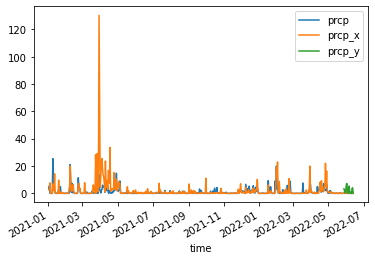

In [58]:
df.plot(x='time', y=['prcp', 'prcp_x', 'prcp_y'])

<AxesSubplot:xlabel='time'>

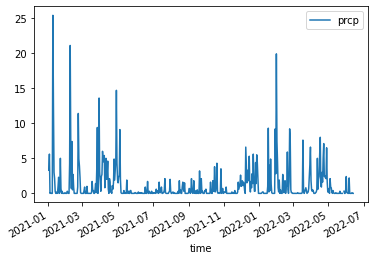

In [59]:
df.plot(x='time', y=['prcp'])

<AxesSubplot:xlabel='time'>

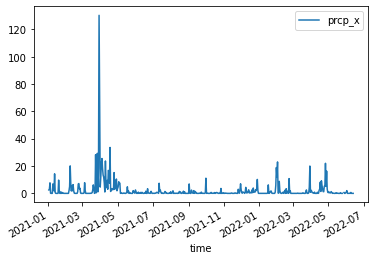

In [60]:
df.plot(x='time', y=['prcp_x'])

<AxesSubplot:xlabel='time'>

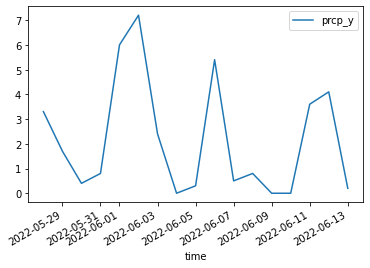

In [61]:
df.plot(x='time', y=['prcp_y'])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863 entries, 0 to 1862
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   time                    1863 non-null   datetime64[ns]
 1   tavg_x                  526 non-null    float64       
 2   tmin_x                  526 non-null    float64       
 3   tmax_x                  526 non-null    float64       
 4   prcp_x                  526 non-null    float64       
 5   snow_x                  0 non-null      object        
 6   wdir_x                  526 non-null    float64       
 7   wspd_x                  526 non-null    float64       
 8   wpgt_x                  0 non-null      object        
 9   pres_x                  526 non-null    float64       
 10  tsun_x                  0 non-null      object        
 11  meteostat_station_id_x  526 non-null    float64       
 12  tavg_y                  1863 non-null   float64 

In [78]:
df[f'prcp_mean'] = df[['prcp', 'prcp_x', 'prcp_y']].mean(axis=1)
df[f'prcp_std'] = df[['prcp', 'prcp_x', 'prcp_y']].std(axis=1)
df[f'prcp_min'] = df[['prcp', 'prcp_x', 'prcp_y']].min(axis=1)
df[f'prcp_max'] = df[['prcp', 'prcp_x', 'prcp_y']].max(axis=1)
df[f'prcp_count'] = df[['prcp', 'prcp_x', 'prcp_y']].count(axis=1)

In [73]:
df[['prcp', 'prcp_x', 'prcp_y']].count(axis=1)

0       2
1       2
2       2
3       2
4       2
       ..
1858    0
1859    0
1860    0
1861    0
1862    0
Length: 1863, dtype: int64

<AxesSubplot:>

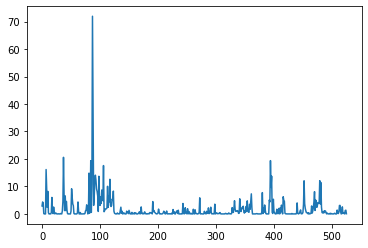

In [63]:
df[f'prcp_mean'].plot()

In [83]:
dfn = df[['time']]

In [84]:
dfn

,time
0,2021-01-02
1,2021-01-03
2,2021-01-04
3,2021-01-05
4,2021-01-06
...,...
521,2022-06-09
522,2022-06-10
523,2022-06-11
524,2022-06-12


In [80]:
df = df[df['prcp_mean'].notna()]
df[['time', 'prcp', 'prcp_x', 'prcp_y', 'prcp_mean', 'prcp_std', 'prcp_min', 'prcp_max', 'prcp_count']].tail(50)

,time,prcp,prcp_x,prcp_y,prcp_mean,prcp_std,prcp_min,prcp_max,prcp_count
476,2022-04-23,7.1,1.2,NaN,4.150000,4.171930,1.2,7.1,2
477,2022-04-24,2.4,5.3,NaN,3.850000,2.050610,2.4,5.3,2
478,2022-04-25,2.5,5.2,NaN,3.850000,1.909188,2.5,5.2,2
479,2022-04-26,2.2,22.0,NaN,12.100000,14.000714,2.2,22.0,2
480,2022-04-27,2.1,5.1,NaN,3.600000,2.121320,2.1,5.1,2
481,2022-04-28,6.5,16.3,NaN,11.400000,6.929646,6.5,16.3,2
482,2022-04-29,1.7,3.2,NaN,2.450000,1.060660,1.7,3.2,2
483,2022-04-30,0.2,0.8,NaN,0.500000,0.424264,0.2,0.8,2
484,2022-05-01,0.2,0.5,NaN,0.350000,0.212132,0.2,0.5,2
485,2022-05-02,0.7,1.0,NaN,0.850000,0.212132,0.7,1.0,2
